# Notebook to plot cross power spectra and measure the effect of k-essence

In [1]:
#Last version 2021-06-02 13:53:32 

## Loading packages

In [2]:
import numpy as np
# import MAS_library as MASL
import plotting_library as PL
from pylab import *
from matplotlib.colors import LogNorm
import matplotlib as plt
import pandas as pd
import h5py as h5
import matplotlib.pyplot as plt
text_size=26
fig_size_x=24
fig_size_y=14
from collections import defaultdict

import seaborn as sns
Colors = sns.color_palette("colorblind", 16).as_hex()
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy import interpolate
from sympy import symbols, Eq, solve

## Nested dictionary

In [3]:
def nested_dict(n, type):
    if n == 1:
        return defaultdict(type)
    else:
        return defaultdict(lambda: nested_dict(n-1, type))
    
data = nested_dict(5, list)
pow_gev = nested_dict(2, list)
class_data = nested_dict(3, list)
rsd_coeff = nested_dict(2, list)
bias_halo = nested_dict(2, list)
bias_halo_lin = nested_dict(2, list)
rsd_coeff_halo = nested_dict(2, list)
f_gr_data =nested_dict(2, list)

## Loading power and CF data

In [4]:
directory = "/Users/farbod/Dropbox/Projects/Doppler_RSD/Data/Powerpsectra_correlationfunction_particles_Pylians/"
directory_halo = "/Users/farbod/Dropbox/Projects/Doppler_RSD/Data/Power_spectra_correlation_function_RSD_noRSD_Halos/"
# directory_power = "/Users/farbod/Dropbox/Projects/Doppler_RSD//Data/kevolution_gevolution_power_output/"
directory_cross = "/Users/farbod/Dropbox/Projects/Doppler_RSD/Data/HaloxPcls_CrossPowerSpectra///"

files=["gevolution_boxsize_4032_ngrid_4608_lcdm_05062020",
       "gevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_1_05062020",
       "kevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_em4_05062020",
       "gevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_em7_05062020",
        "kevolution_boxsize_4032_ngrid_4608_w_0m9_cs2_em7_05062020"];

redshifts = ["0", "0.5", "1", "2", "3"];
files_list = ['gev_lcdm','gev_em0','gev_em7','kev_em4','kev_em7'];


#############    
### Pylians #
#############
for j in range(5): # file
    for i in range(5): # redshift
        if (j==0):
            data['cdm']['RSD'][files_list[j]]['pow']['z='+str(redshifts[i])]=load(directory+"/RSD_pcls///pk3D_"+files[j]+"_z_"+str(redshifts[i])+".npy");
#             data['cdm']['RSD'][files_list[j]]['cor']['z='+str(redshifts[i])]=load(directory+"/RSD_pcls/CF_full_"+files[j]+"_z_"+str(redshifts[i])+".npy");
        else:
            data['cdm']['RSD'][files_list[j]]['pow']['z='+str(redshifts[i])]=load(directory+"/RSD_wcdm_pcls//pk3D_"+files[j]+"_z_"+str(redshifts[i])+".npy");
#             data['cdm']['RSD'][files_list[j]]['cor']['z='+str(redshifts[i])]=load(directory+"/RSD_wcdm_pcls/CF_full_"+files[j]+"_z_"+str(redshifts[i])+".npy");

        data['cdm']['noRSD'][files_list[j]]['pow']['z='+str(redshifts[i])]=load(directory+"/no_RSD/pk3D_"+files[j]+"_z_"+str(redshifts[i])+".npy");
#         data['cdm']['noRSD'][files_list[j]]['cor']['z='+str(redshifts[i])]=load(directory+"/no_RSD/CF_full_"+files[j]+"_z_"+str(redshifts[i])+".npy");
        data['halo']['noRSD'][files_list[j]]['pow']['z='+str(redshifts[i])]=load(directory_halo+"/no_RSD//pk3D_"+files[j]+"_z_"+str(redshifts[i])+".npy");
        data['halo']['RSD'][files_list[j]]['pow']['z='+str(redshifts[i])]=load(directory_halo+"/RSD/pk3D_"+files[j]+"_z_"+str(redshifts[i])+".npy");
#         data['halo']['noRSD'][files_list[j]]['cor']['z='+str(redshifts[i])]=load(directory_halo+"/no_RSD//CF_full_"+files[j]+"_z_"+str(redshifts[i])+".npy");
#         data['halo']['RSD'][files_list[j]]['cor']['z='+str(redshifts[i])]=load(directory_halo+"/RSD/CF_full_"+files[j]+"_z_"+str(redshifts[i])+".npy");
        data['cross']['noRSD'][files_list[j]]['pow']['z='+str(redshifts[i])]=load(directory_cross+"/noRSD/Cross_powerspectra_no_RSD///cross_pk3D_"+files[j]+"_z_"+str(redshifts[i])+".npy");

        if (j==0):
            data['cross']['RSD'][files_list[j]]['pow']['z='+str(redshifts[i])]=load(directory_cross+"/RSD/Cross_powerspectra_lcdm//cross_pk3D_"+files[j]+"_z_"+str(redshifts[i])+".npy");
        else: 
            data['cross']['RSD'][files_list[j]]['pow']['z='+str(redshifts[i])]=load(directory_cross+"/RSD/Cross_powerspectra_wcdm//cross_pk3D_"+files[j]+"_z_"+str(redshifts[i])+".npy");


# Cross power,  no RSD 

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


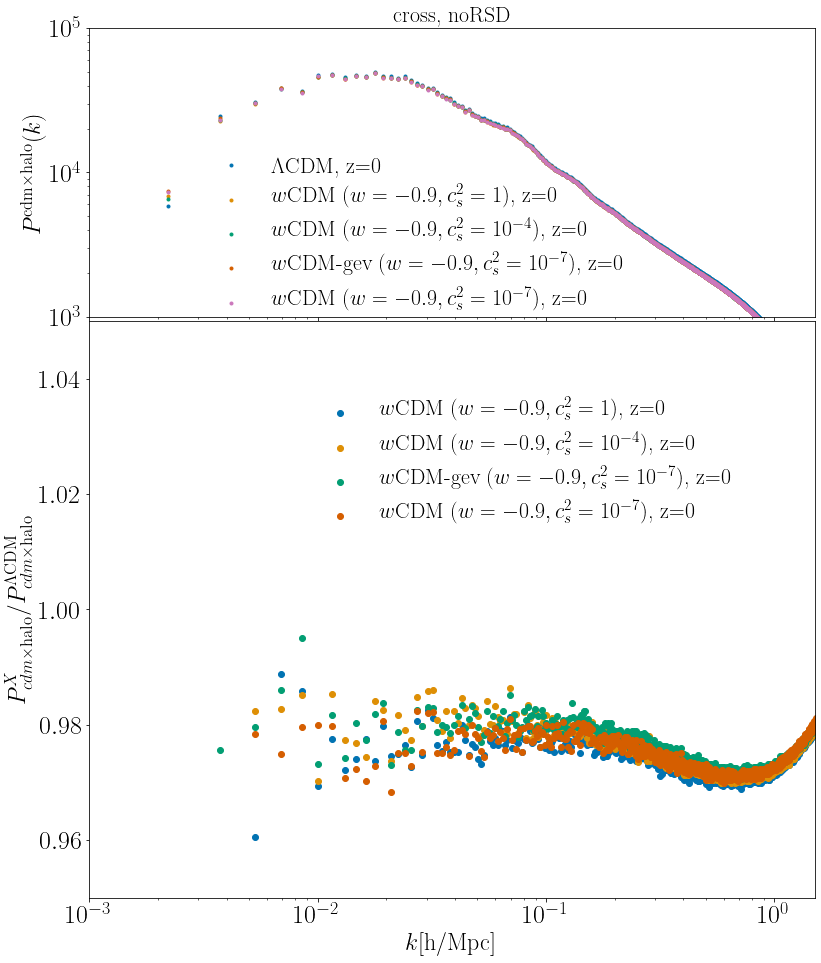

In [5]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,2]})
plt.subplots_adjust(hspace=0.01)



kind = 'cross'
RSD ='noRSD'
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ",
          "$w$CDM ($w=-0.9, c_s^2=10^{-4}$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];
l=0
for i in [0,1,2,3,4]: # file
    for j in [0]: # Redshifts
        [k_w,pk]=data[kind][RSD][files_list[i]]['pow']['z='+str(redshifts[j])][[0,7],:]  
        axs[0].loglog(k_w,pk,".",color =Colors[l], lw=3,label=decrip[i]+z[j])
        l=l+1

axs[0].set_ylabel(r'$P^{\rm{cdm} \times \rm{halo}}(k)$',fontsize=24)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[0].set_title(kind+", "+RSD, fontsize=22)

# plt.yscale('log')
# axs[0].xticks(size = 25);
# axs[0].yticks(size = 25);
axs[0].set_ylim(1.e3,1.e5)
axs[0].set_xlim(1.e-3,2.e0)
axs[0].legend(fontsize=22,bbox_to_anchor=[0.45, 0.28], loc='center',frameon=False)
# Relative difference:

l=0
for num1 in [0,1,2,3,4]: # file 1
    for num2 in [0]: # file2
        for j in [0]: # Redshifts
            if(num1!=num2):
                [k1,pk1]=data[kind][RSD][files_list[num1]]['pow']['z='+str(redshifts[j])][[0,7],:]  
                [k2,pk2]=data[kind][RSD][files_list[num2]]['pow']['z='+str(redshifts[j])][[0,7],:]  
                g = (pk1)/pk2;
                axs[1].plot(k1,g,"o",color =Colors[l], lw=3,label=decrip[num1]+" "+z[j])
                l=l+1;
                

axs[1].set_ylabel(r'$P^X_{cdm \times \rm{halo}}/P_{cdm \times \rm{halo}}^{\Lambda \rm{CDM} }$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('symlog')
axs[1].set_ylim(0.95,1.05)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.6, 0.75], loc='center',frameon=False)
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)
# plt.savefig('noRSD_halo_monopole.pdf', format='pdf',dpi=300, bbox_inches='tight' )


## Different redshift

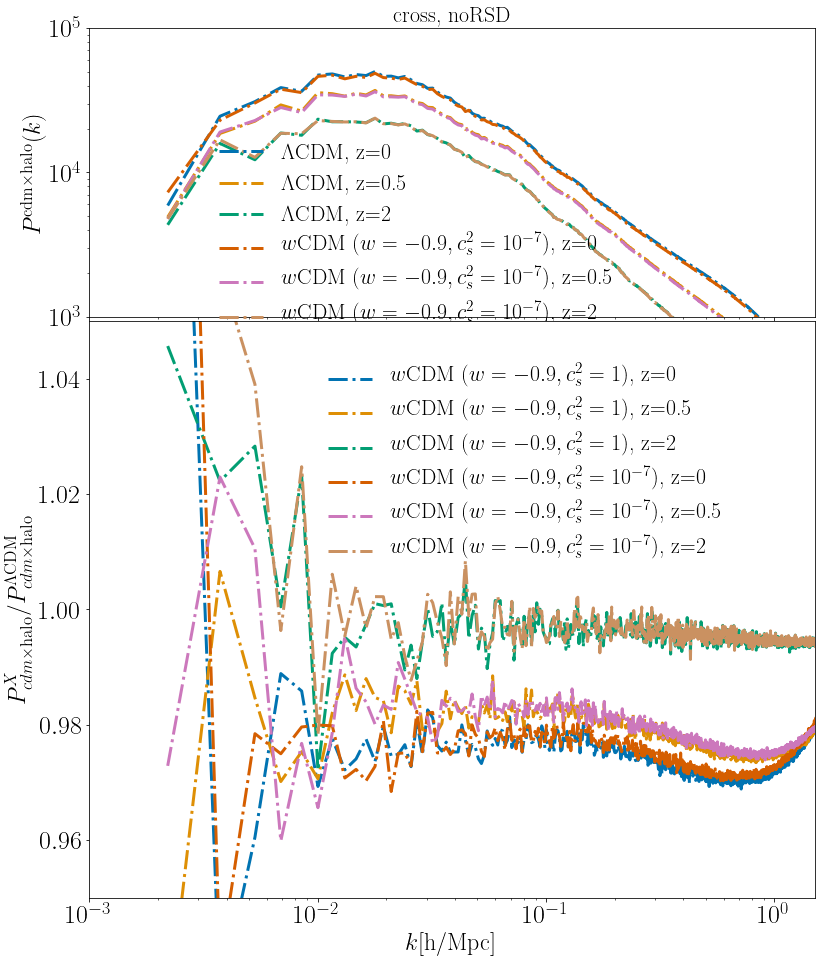

In [70]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,2]})
plt.subplots_adjust(hspace=0.01)



kind = 'cross'
RSD ='noRSD'
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ",
          "$w$CDM ($w=-0.9, c_s^2=10^{-4}$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];
l=0
for i in [0,4]: # file
    for j in [0,1,3]: # Redshifts
        [k_w,pk]=data[kind][RSD][files_list[i]]['pow']['z='+str(redshifts[j])][[0,7],:]  
        axs[0].loglog(k_w,pk,"-.",color =Colors[l], lw=3,label=decrip[i]+z[j])
        l=l+1

axs[0].set_ylabel(r'$P^{\rm{cdm} \times \rm{halo}}(k)$',fontsize=24)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[0].set_title(kind+", "+RSD, fontsize=22)

# plt.yscale('log')
# axs[0].xticks(size = 25);
# axs[0].yticks(size = 25);
axs[0].set_ylim(1.e3,1.e5)
axs[0].set_xlim(1.e-3,2.e0)
axs[0].legend(fontsize=22,bbox_to_anchor=[0.45, 0.28], loc='center',frameon=False)
# Relative difference:

l=0
for num1 in [1,4]: # file 1
    for num2 in [0]: # file2
        for j in [0,1,3]: # Redshifts
            if(num1!=num2):
                [k1,pk1]=data[kind][RSD][files_list[num1]]['pow']['z='+str(redshifts[j])][[0,7],:]  
                [k2,pk2]=data[kind][RSD][files_list[num2]]['pow']['z='+str(redshifts[j])][[0,7],:]  
                g = (pk1)/pk2;
                axs[1].plot(k1,g,"-.",color =Colors[l], lw=3,label=decrip[num1]+" "+z[j])
                l=l+1;
                

axs[1].set_ylabel(r'$P^X_{cdm \times \rm{halo}}/P_{cdm \times \rm{halo}}^{\Lambda \rm{CDM} }$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('symlog')
axs[1].set_ylim(0.95,1.05)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.6, 0.75], loc='center',frameon=False)
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)
# plt.savefig('noRSD_halo_monopole.pdf', format='pdf',dpi=300, bbox_inches='tight' )


### Cross power test

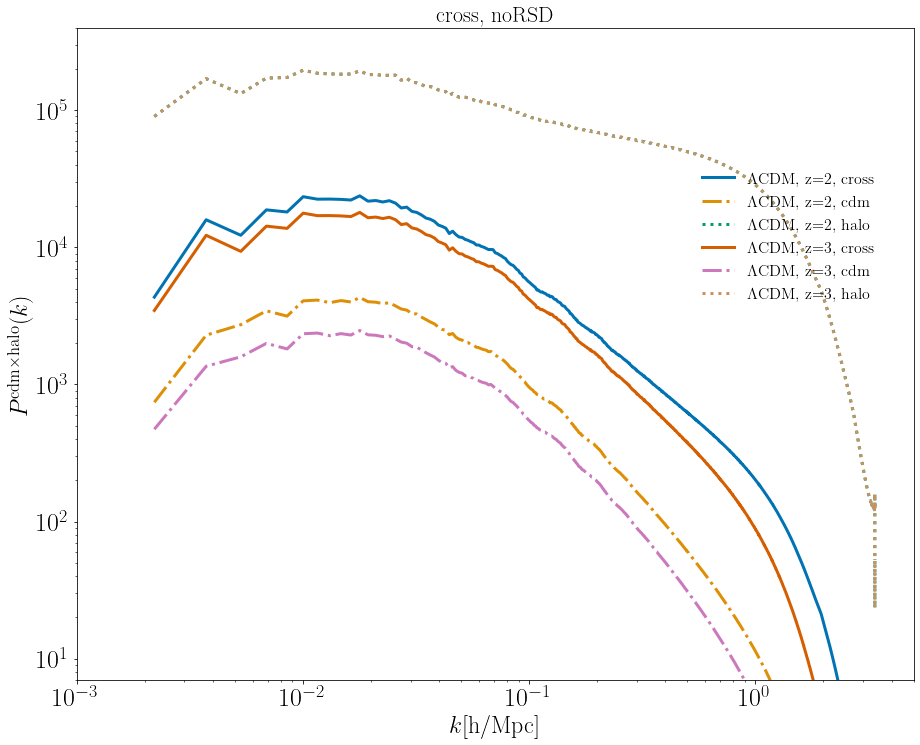

In [31]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(15,12))
plt.subplots_adjust(hspace=0.01)




decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ",
          "$w$CDM ($w=-0.9, c_s^2=10^{-4}$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];
l=0
for i in [0]: # file
    for j in [3,4]: # Redshifts
        kind = 'cross'
        RSD ='noRSD'
        [k_w,pk]=data[kind][RSD][files_list[i]]['pow']['z='+str(redshifts[j])][[0,7],:]  
        axs.loglog(k_w,pk,"-",color =Colors[l], lw=3,label=decrip[i]+z[j]+", cross")
        l=l+1
        [k_w,pk]=data[kind][RSD][files_list[i]]['pow']['z='+str(redshifts[j])][[0,2],:]  
        axs.loglog(k_w,pk,"-.",color =Colors[l], lw=3,label=decrip[i]+z[j]+", cdm")
        l=l+1
        [k_w,pk]=data[kind][RSD][files_list[i]]['pow']['z='+str(redshifts[j])][[0,1],:]  
        axs.loglog(k_w,pk,":",color =Colors[l], lw=3,label=decrip[i]+z[j]+", halo")
        l=l+1

axs.set_ylabel(r'$P^{\rm{cdm} \times \rm{halo}}(k)$',fontsize=24)
axs.set_xlabel('$k$[h/Mpc]',fontsize=24)
axs.set_title(kind+", "+RSD, fontsize=22)

# plt.yscale('log')
# axs.xticks(size = 25);
# axs.yticks(size = 25);
axs.set_ylim(7.e0,4.e5)
axs.set_xlim(1.e-3,5.e0)
axs.legend(fontsize=16,bbox_to_anchor=[0.85, 0.68], loc='center',frameon=False)


# Cross power spectra ,  RSD

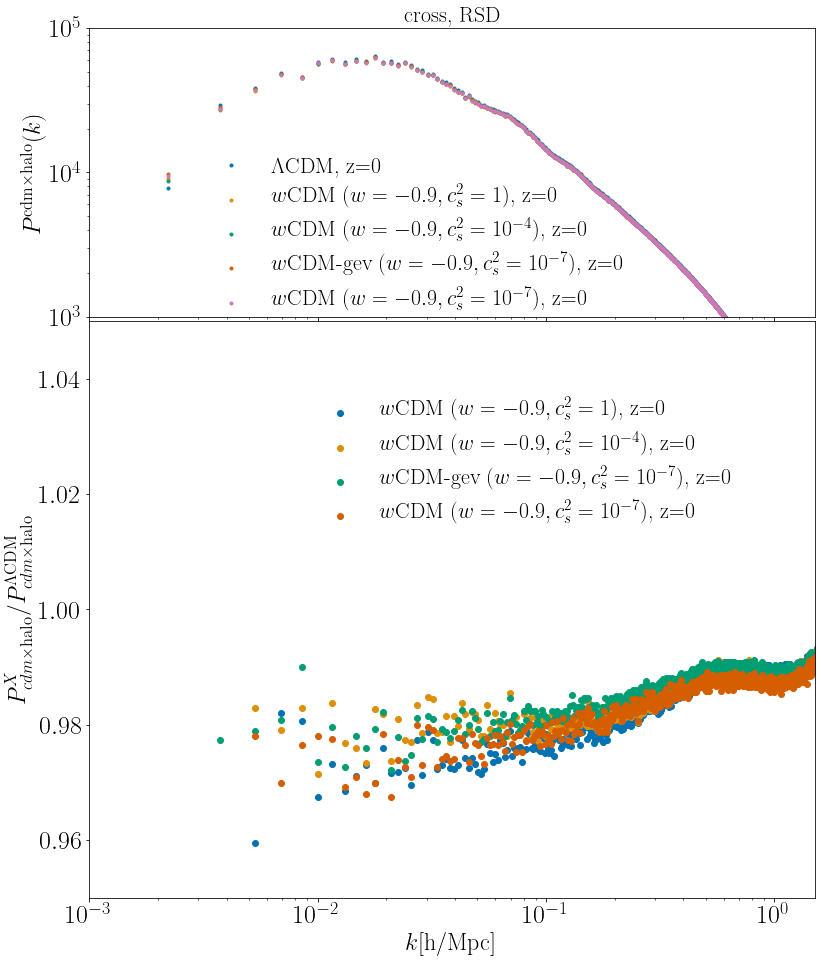

In [71]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,2]})
plt.subplots_adjust(hspace=0.01)



kind = 'cross'
RSD ='RSD'
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ",
          "$w$CDM ($w=-0.9, c_s^2=10^{-4}$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];
l=0
for i in [0,1,2,3,4]: # file
    for j in [0]: # Redshifts
        [k_w,pk]=data[kind][RSD][files_list[i]]['pow']['z='+str(redshifts[j])][[0,7],:]  
        axs[0].loglog(k_w,pk,".",color =Colors[l], lw=3,label=decrip[i]+z[j])
        l=l+1

axs[0].set_ylabel(r'$P^{\rm{cdm} \times \rm{halo}}(k)$',fontsize=24)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[0].set_title(kind+", "+RSD, fontsize=22)

# plt.yscale('log')
# axs[0].xticks(size = 25);
# axs[0].yticks(size = 25);
axs[0].set_ylim(1.e3,1.e5)
axs[0].set_xlim(1.e-3,2.e0)
axs[0].legend(fontsize=22,bbox_to_anchor=[0.45, 0.28], loc='center',frameon=False)
# Relative difference:

l=0
for num1 in [0,1,2,3,4]: # file 1
    for num2 in [0]: # file2
        for j in [0]: # Redshifts
            if(num1!=num2):
                [k1,pk1]=data[kind][RSD][files_list[num1]]['pow']['z='+str(redshifts[j])][[0,7],:]  
                [k2,pk2]=data[kind][RSD][files_list[num2]]['pow']['z='+str(redshifts[j])][[0,7],:]  
                g = (pk1)/pk2;
                axs[1].plot(k1,g,"o",color =Colors[l], lw=3,label=decrip[num1]+" "+z[j])
                l=l+1;
                

axs[1].set_ylabel(r'$P^X_{cdm \times \rm{halo}}/P_{cdm \times \rm{halo}}^{\Lambda \rm{CDM} }$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('symlog')
axs[1].set_ylim(0.95,1.05)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.6, 0.75], loc='center',frameon=False)
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)
# plt.savefig('noRSD_halo_monopole.pdf', format='pdf',dpi=300, bbox_inches='tight' )


## Redshift evolution

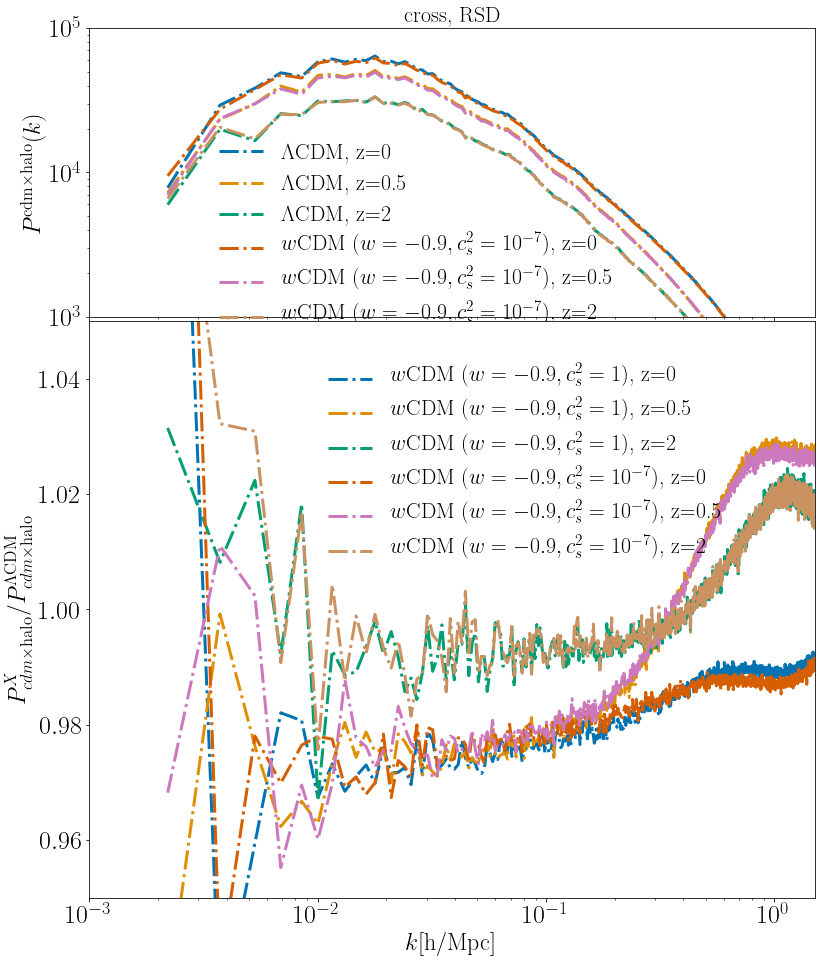

In [72]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,2]})
plt.subplots_adjust(hspace=0.01)



kind = 'cross'
RSD ='RSD'
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ",
          "$w$CDM ($w=-0.9, c_s^2=10^{-4}$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];
l=0
for i in [0,4]: # file
    for j in [0,1,3]: # Redshifts
        [k_w,pk]=data[kind][RSD][files_list[i]]['pow']['z='+str(redshifts[j])][[0,7],:]  
        axs[0].loglog(k_w,pk,"-.",color =Colors[l], lw=3,label=decrip[i]+z[j])
        l=l+1

axs[0].set_ylabel(r'$P^{\rm{cdm} \times \rm{halo}}(k)$',fontsize=24)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[0].set_title(kind+", "+RSD, fontsize=22)

# plt.yscale('log')
# axs[0].xticks(size = 25);
# axs[0].yticks(size = 25);
axs[0].set_ylim(1.e3,1.e5)
axs[0].set_xlim(1.e-3,2.e0)
axs[0].legend(fontsize=22,bbox_to_anchor=[0.45, 0.28], loc='center',frameon=False)
# Relative difference:

l=0
for num1 in [1,4]: # file 1
    for num2 in [0]: # file2
        for j in [0,1,3]: # Redshifts
            if(num1!=num2):
                [k1,pk1]=data[kind][RSD][files_list[num1]]['pow']['z='+str(redshifts[j])][[0,7],:]  
                [k2,pk2]=data[kind][RSD][files_list[num2]]['pow']['z='+str(redshifts[j])][[0,7],:]  
                g = (pk1)/pk2;
                axs[1].plot(k1,g,"-.",color =Colors[l], lw=3,label=decrip[num1]+" "+z[j])
                l=l+1;
                

axs[1].set_ylabel(r'$P^X_{cdm \times \rm{halo}}/P_{cdm \times \rm{halo}}^{\Lambda \rm{CDM} }$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('symlog')
axs[1].set_ylim(0.95,1.05)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.6, 0.75], loc='center',frameon=False)
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)
# plt.savefig('noRSD_halo_monopole.pdf', format='pdf',dpi=300, bbox_inches='tight' )


# RSD over no RSD

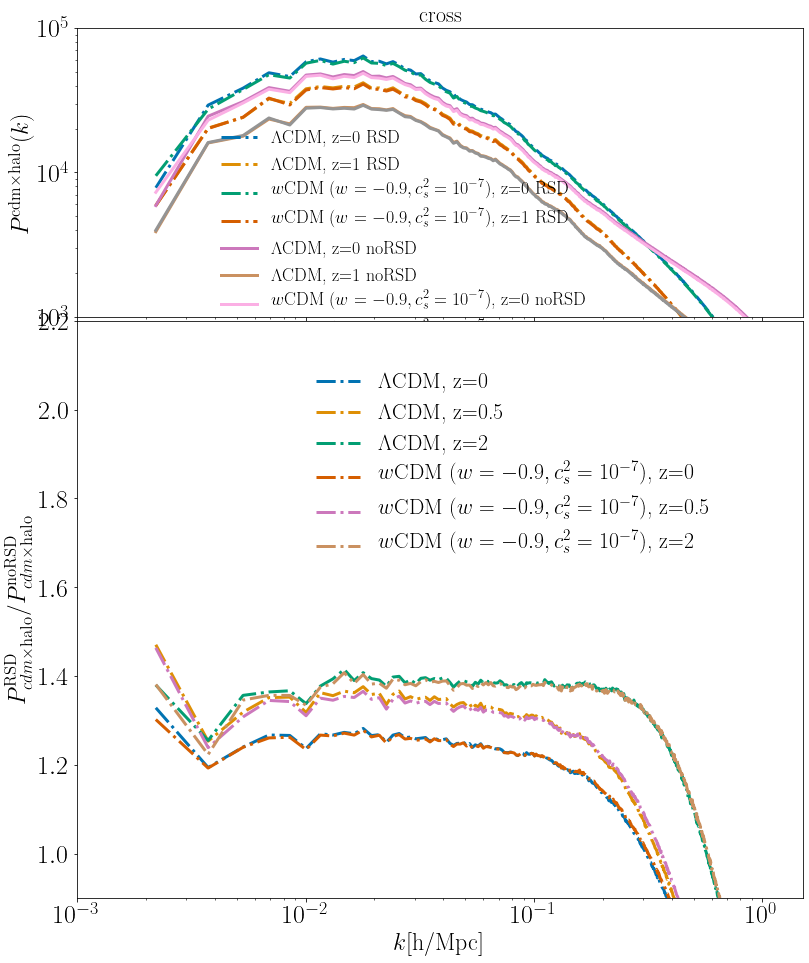

In [91]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(13,16),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,2]})
plt.subplots_adjust(hspace=0.01)



kind = 'cross'
RSD ='RSD'
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ",
          "$w$CDM ($w=-0.9, c_s^2=10^{-4}$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];
l=0
for i in [0,4]: # file
    for j in [0,2]: # Redshifts
        [k_w,pk]=data[kind][RSD][files_list[i]]['pow']['z='+str(redshifts[j])][[0,7],:]  
        axs[0].loglog(k_w,pk,"-.",color =Colors[l], lw=3,label=decrip[i]+z[j]+" "+RSD)
        l=l+1
        
kind = 'cross'
RSD ='noRSD'
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ",
          "$w$CDM ($w=-0.9, c_s^2=10^{-4}$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];
# l=0
for i in [0,4]: # file
    for j in [0,2]: # Redshifts
        [k_w,pk]=data[kind][RSD][files_list[i]]['pow']['z='+str(redshifts[j])][[0,7],:]  
        axs[0].loglog(k_w,pk,"-",color =Colors[l], lw=3,label=decrip[i]+z[j]+" "+RSD)
        l=l+1

axs[0].set_ylabel(r'$P^{\rm{cdm} \times \rm{halo}}(k)$',fontsize=24)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[0].set_title(kind, fontsize=22)

# plt.yscale('log')
# axs[0].xticks(size = 25);
# axs[0].yticks(size = 25);
axs[0].set_ylim(1.e3,1.e5)
axs[0].set_xlim(1.e-3,2.e0)
axs[0].legend(fontsize=18,bbox_to_anchor=[0.45, 0.28], loc='center',frameon=False)
# Relative difference:



l=0
for num1 in [0,4]: # file 1
    for j in [0,1,3]: # Redshifts
#         if(num1!=num2):
        [k1,pk1]=data[kind]['RSD'][files_list[num1]]['pow']['z='+str(redshifts[j])][[0,7],:]  
        [k2,pk2]=data[kind]['noRSD'][files_list[num1]]['pow']['z='+str(redshifts[j])][[0,7],:]  
        g = (pk1)/pk2;
        axs[1].plot(k1,g,"-.",color =Colors[l], lw=3,label=decrip[num1]+" "+z[j])
        l=l+1;
                

axs[1].set_ylabel(r'$P^{\rm RSD}_{cdm \times \rm{halo}}/P_{cdm \times \rm{halo}}^{\rm no RSD }$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('log')
axs[1].set_ylim(0.9,2.2)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.6, 0.75], loc='center',frameon=False)
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)
# plt.savefig('noRSD_halo_monopole.pdf', format='pdf',dpi=300, bbox_inches='tight' )


# Normalized cross power

## no RSD

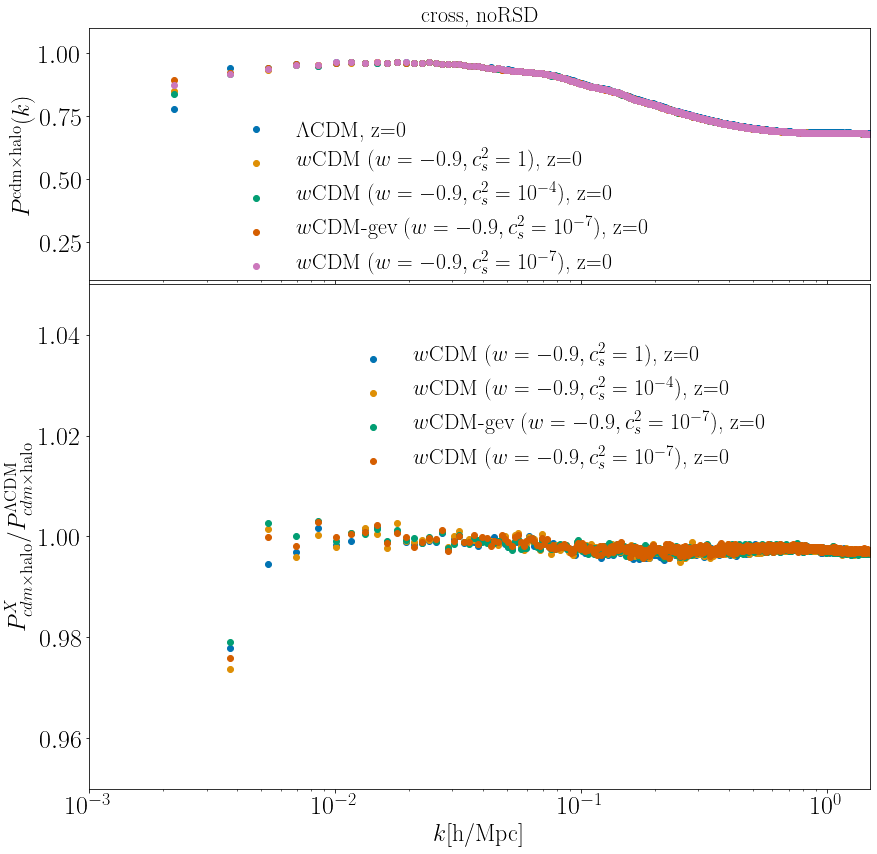

In [104]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(14,14),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,2]})
plt.subplots_adjust(hspace=0.01)



kind = 'cross'
RSD ='noRSD'
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ",
          "$w$CDM ($w=-0.9, c_s^2=10^{-4}$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];
l=0
for i in [0,1,2,3,4]: # file
    for j in [0]: # Redshifts
        [k_w,pk]=data[kind][RSD][files_list[i]]['pow']['z='+str(redshifts[j])][[0,7],:]  
        [k_w,pk_halo]=data[kind][RSD][files_list[i]]['pow']['z='+str(redshifts[j])][[0,1],:]  
        [k_w,pk_cdm]=data[kind][RSD][files_list[i]]['pow']['z='+str(redshifts[j])][[0,2],:]  

        axs[0].plot(k_w,pk/np.sqrt(pk_halo*pk_cdm),"o",color =Colors[l], lw=3,label=decrip[i]+z[j])
        l=l+1

axs[0].set_ylabel(r'$P^{\rm{cdm} \times \rm{halo}}(k)$',fontsize=24)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[0].set_title(kind+", "+RSD, fontsize=22)

# plt.yscale('log')
# axs[0].xticks(size = 25);
# axs[0].yticks(size = 25);
axs[0].set_ylim(1.e-1,1.1)
axs[0].set_xlim(1.e-3,2.e0)
axs[0].legend(fontsize=22,bbox_to_anchor=[0.45, 0.32], loc='center',frameon=False)
# Relative difference:

l=0
for num1 in [0,1,2,3,4]: # file 1
    for num2 in [0]: # file2
        for j in [0]: # Redshifts
            if(num1!=num2):
                [k1,pk1]=data[kind][RSD][files_list[num1]]['pow']['z='+str(redshifts[j])][[0,7],:]
                [k_w,pk_halo]=data[kind][RSD][files_list[num1]]['pow']['z='+str(redshifts[j])][[0,1],:]  
                [k_w,pk_cdm]=data[kind][RSD][files_list[num1]]['pow']['z='+str(redshifts[j])][[0,2],:]  
                p_cross_1 = pk1/np.sqrt(pk_cdm*pk_halo);
                
                [k2,pk2]=data[kind][RSD][files_list[num2]]['pow']['z='+str(redshifts[j])][[0,7],:]  
                [k_w,pk_halo2]=data[kind][RSD][files_list[num2]]['pow']['z='+str(redshifts[j])][[0,1],:]  
                [k_w,pk_cdm2]=data[kind][RSD][files_list[num2]]['pow']['z='+str(redshifts[j])][[0,2],:]  
                p_cross_2 = pk2/np.sqrt(pk_cdm2*pk_halo2);
                p_ratio = (p_cross_1)/p_cross_2;
                axs[1].plot(k1,p_ratio,"o",color =Colors[l], lw=3,label=decrip[num1]+" "+z[j])
                l=l+1;
                

axs[1].set_ylabel(r'$P^X_{cdm \times \rm{halo}}/P_{cdm \times \rm{halo}}^{\Lambda \rm{CDM} }$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('symlog')
axs[1].set_ylim(0.95,1.05)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.6, 0.75], loc='center',frameon=False)
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)
# plt.savefig('noRSD_halo_monopole.pdf', format='pdf',dpi=300, bbox_inches='tight' )


## RSD

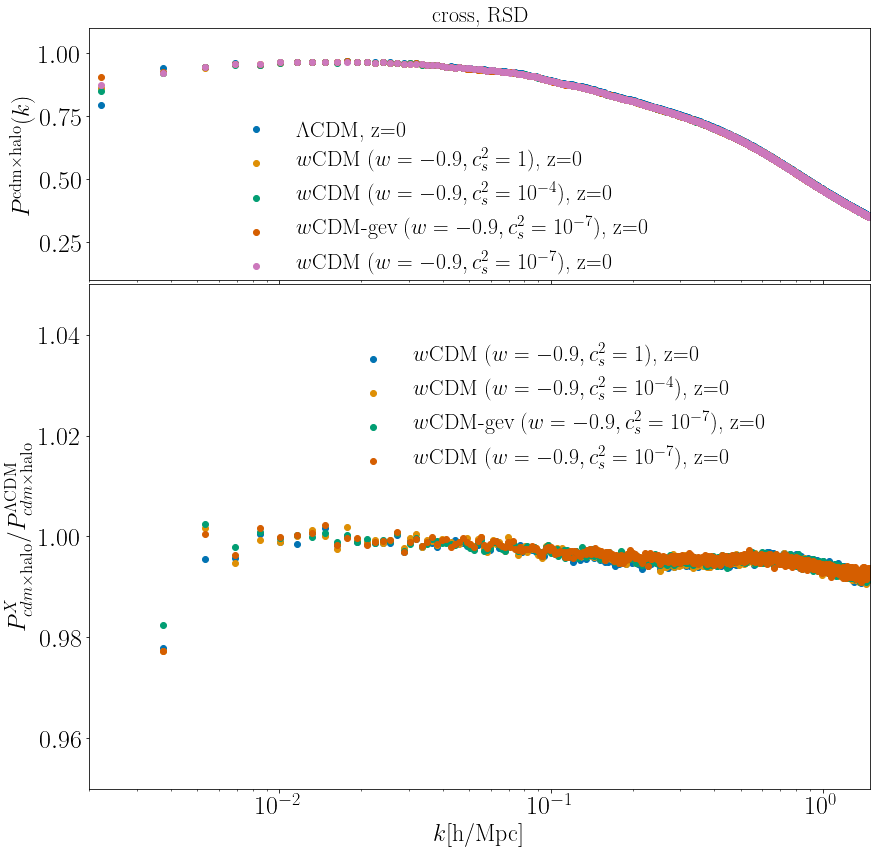

In [106]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(14,14),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,2]})
plt.subplots_adjust(hspace=0.01)



kind = 'cross'
RSD ='RSD'
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ",
          "$w$CDM ($w=-0.9, c_s^2=10^{-4}$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];
l=0
for i in [0,1,2,3,4]: # file
    for j in [0]: # Redshifts
        [k_w,pk]=data[kind][RSD][files_list[i]]['pow']['z='+str(redshifts[j])][[0,7],:]  
        [k_w,pk_halo]=data[kind][RSD][files_list[i]]['pow']['z='+str(redshifts[j])][[0,1],:]  
        [k_w,pk_cdm]=data[kind][RSD][files_list[i]]['pow']['z='+str(redshifts[j])][[0,2],:]  

        axs[0].plot(k_w,pk/np.sqrt(pk_halo*pk_cdm),"o",color =Colors[l], lw=3,label=decrip[i]+z[j])
        l=l+1

axs[0].set_ylabel(r'$P^{\rm{cdm} \times \rm{halo}}(k)$',fontsize=24)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[0].set_title(kind+", "+RSD, fontsize=22)

# plt.yscale('log')
# axs[0].xticks(size = 25);
# axs[0].yticks(size = 25);
axs[0].set_ylim(1.e-1,1.1)
axs[0].set_xlim(1.e-3,2.e0)
axs[0].legend(fontsize=22,bbox_to_anchor=[0.45, 0.32], loc='center',frameon=False)
# Relative difference:

l=0
for num1 in [0,1,2,3,4]: # file 1
    for num2 in [0]: # file2
        for j in [0]: # Redshifts
            if(num1!=num2):
                [k1,pk1]=data[kind][RSD][files_list[num1]]['pow']['z='+str(redshifts[j])][[0,7],:]
                [k_w,pk_halo]=data[kind][RSD][files_list[num1]]['pow']['z='+str(redshifts[j])][[0,1],:]  
                [k_w,pk_cdm]=data[kind][RSD][files_list[num1]]['pow']['z='+str(redshifts[j])][[0,2],:]  
                p_cross_1 = pk1/np.sqrt(pk_cdm*pk_halo);
                
                [k2,pk2]=data[kind][RSD][files_list[num2]]['pow']['z='+str(redshifts[j])][[0,7],:]  
                [k_w,pk_halo2]=data[kind][RSD][files_list[num2]]['pow']['z='+str(redshifts[j])][[0,1],:]  
                [k_w,pk_cdm2]=data[kind][RSD][files_list[num2]]['pow']['z='+str(redshifts[j])][[0,2],:]  
                p_cross_2 = pk2/np.sqrt(pk_cdm2*pk_halo2);
                p_ratio = (p_cross_1)/p_cross_2;
                axs[1].plot(k1,p_ratio,"o",color =Colors[l], lw=3,label=decrip[num1]+" "+z[j])
                l=l+1;
                

axs[1].set_ylabel(r'$P^X_{cdm \times \rm{halo}}/P_{cdm \times \rm{halo}}^{\Lambda \rm{CDM} }$',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('symlog')
axs[1].set_ylim(0.95,1.05)
axs[1].set_xlim(2.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.6, 0.75], loc='center',frameon=False)
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)
# plt.savefig('noRSD_halo_monopole.pdf', format='pdf',dpi=300, bbox_inches='tight' )


## Redshift evolution, no RSD

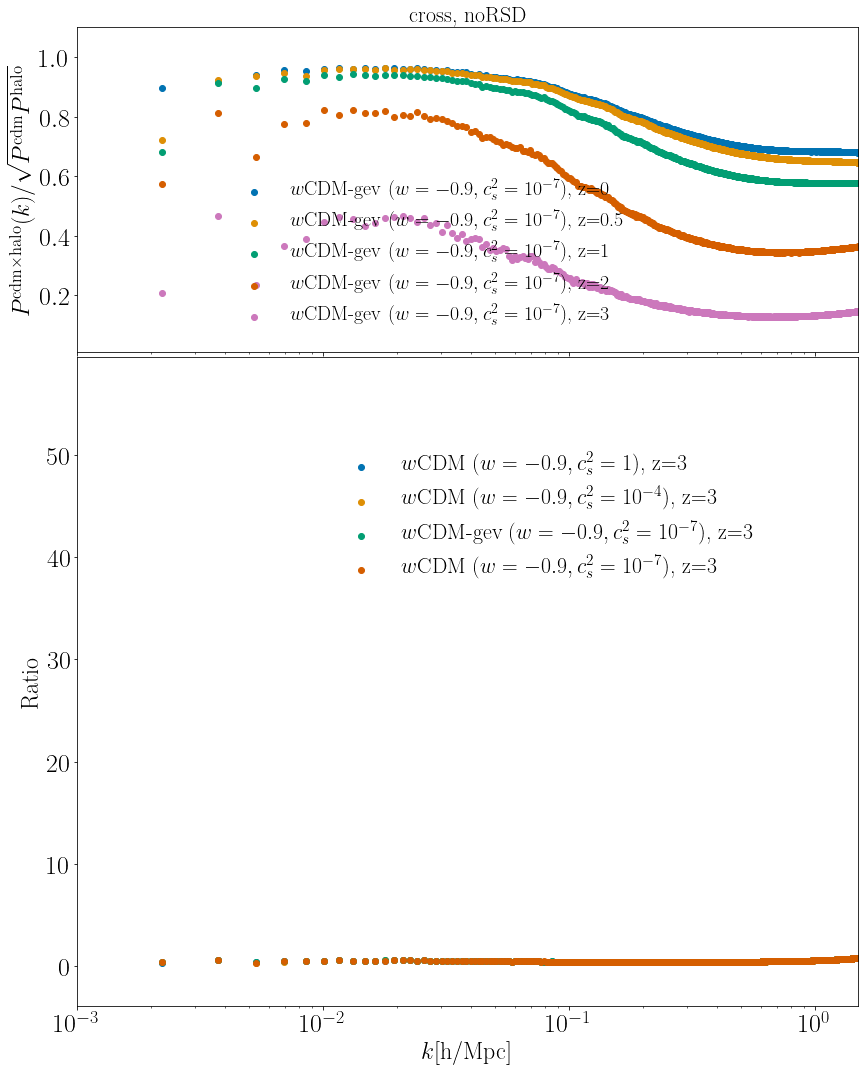

In [129]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(14,18),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,2]})
plt.subplots_adjust(hspace=0.01)



kind = 'cross'
RSD ='noRSD'
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ",
          "$w$CDM ($w=-0.9, c_s^2=10^{-4}$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];
l=0
for i in [3]: # file
    for j in [0,1,2,3,4]: # Redshifts
        [k_w,pk]=data[kind][RSD][files_list[i]]['pow']['z='+str(redshifts[j])][[0,7],:]  
        [k_w,pk_halo]=data[kind][RSD][files_list[i]]['pow']['z='+str(redshifts[j])][[0,1],:]  
        [k_w,pk_cdm]=data[kind][RSD][files_list[i]]['pow']['z='+str(redshifts[j])][[0,2],:]  

        axs[0].plot(k_w,pk/np.sqrt(pk_halo*pk_cdm),"o",color =Colors[l], lw=3,label=decrip[i]+z[j])
        l=l+1

axs[0].set_ylabel(r'$P^{\rm{cdm} \times \rm{halo}}(k)/\sqrt {P^{\rm{cdm}}  P^{\rm{halo}}}$',fontsize=24)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[0].set_title(kind+", "+RSD, fontsize=22)

# plt.yscale('log')
# axs[0].xticks(size = 25);
# axs[0].yticks(size = 25);
axs[0].set_ylim(1.e-2,1.1)
axs[0].set_xlim(1.e-3,2.e0)
axs[0].legend(fontsize=20,bbox_to_anchor=[0.45, 0.3], loc='center',frameon=False)
# Relative difference:

l=0
for num1 in [0,1,2,3,4]: # file 1
    for num2 in [0]: # file2
        for j in [4]: # Redshifts
            if(num1!=num2):
                [k1,pk1]=data[kind][RSD][files_list[num1]]['pow']['z='+str(redshifts[j])][[0,7],:]
                [k_w,pk_halo]=data[kind][RSD][files_list[num1]]['pow']['z='+str(redshifts[j])][[0,1],:]  
                [k_w,pk_cdm]=data[kind][RSD][files_list[num1]]['pow']['z='+str(redshifts[j])][[0,2],:]  
                p_cross_1 = pk1/np.sqrt(pk_cdm*pk_halo);
                
                [k2,pk2]=data[kind][RSD][files_list[num2]]['pow']['z='+str(redshifts[j])][[0,7],:]  
                [k_w,pk_halo2]=data[kind][RSD][files_list[num2]]['pow']['z='+str(redshifts[j])][[0,1],:]  
                [k_w,pk_cdm2]=data[kind][RSD][files_list[num2]]['pow']['z='+str(redshifts[j])][[0,2],:]  
                p_cross_2 = pk2/np.sqrt(pk_cdm2*pk_halo2);
                p_ratio = (p_cross_1)/p_cross_2;
                axs[1].plot(k1,p_ratio,"o",color =Colors[l], lw=3,label=decrip[num1]+" "+z[j])
                l=l+1;
                

axs[1].set_ylabel(r'Ratio',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('symlog')
# axs[1].set_ylim(0.95,1.05)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.6, 0.75], loc='center',frameon=False)
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)
# plt.savefig('noRSD_halo_monopole.pdf', format='pdf',dpi=300, bbox_inches='tight' )


## Redshift evolution,  RSD

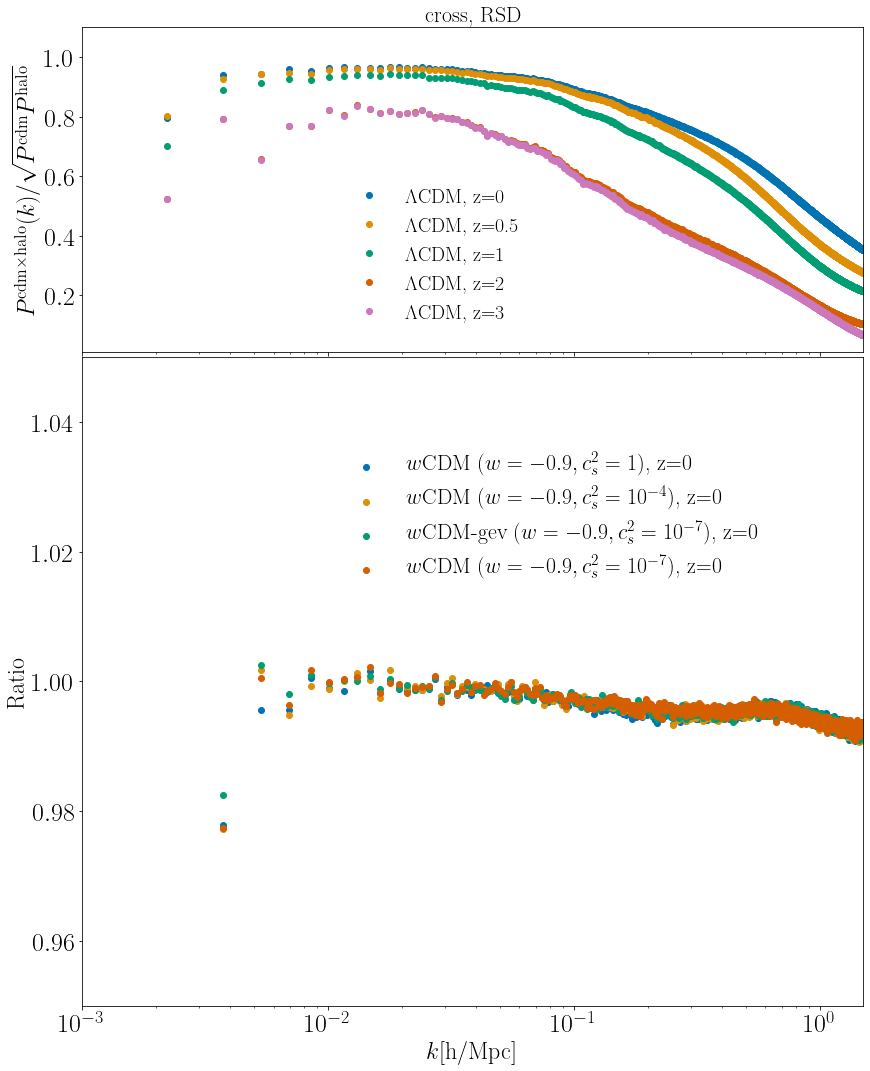

In [122]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(14,18),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,2]})
plt.subplots_adjust(hspace=0.01)



kind = 'cross'
RSD ='RSD'
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ",
          "$w$CDM ($w=-0.9, c_s^2=10^{-4}$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];
l=0
for i in [0]: # file
    for j in [0,1,2,3,4]: # Redshifts
        [k_w,pk]=data[kind][RSD][files_list[i]]['pow']['z='+str(redshifts[j])][[0,7],:]  
        [k_w,pk_halo]=data[kind][RSD][files_list[i]]['pow']['z='+str(redshifts[j])][[0,1],:]  
        [k_w,pk_cdm]=data[kind][RSD][files_list[i]]['pow']['z='+str(redshifts[j])][[0,2],:]  

        axs[0].plot(k_w,pk/np.sqrt(pk_halo*pk_cdm),"o",color =Colors[l], lw=3,label=decrip[i]+z[j])
        l=l+1

axs[0].set_ylabel(r'$P^{\rm{cdm} \times \rm{halo}}(k)/\sqrt {P^{\rm{cdm}}  P^{\rm{halo}}}$',fontsize=24)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[0].set_title(kind+", "+RSD, fontsize=22)

# plt.yscale('log')
# axs[0].xticks(size = 25);
# axs[0].yticks(size = 25);
axs[0].set_ylim(1.e-2,1.1)
axs[0].set_xlim(1.e-3,2.e0)
axs[0].legend(fontsize=20,bbox_to_anchor=[0.45, 0.3], loc='center',frameon=False)
# Relative difference:

l=0
for num1 in [0,1,2,3,4]: # file 1
    for num2 in [0]: # file2
        for j in [0]: # Redshifts
            if(num1!=num2):
                [k1,pk1]=data[kind][RSD][files_list[num1]]['pow']['z='+str(redshifts[j])][[0,7],:]
                [k_w,pk_halo]=data[kind][RSD][files_list[num1]]['pow']['z='+str(redshifts[j])][[0,1],:]  
                [k_w,pk_cdm]=data[kind][RSD][files_list[num1]]['pow']['z='+str(redshifts[j])][[0,2],:]  
                p_cross_1 = pk1/np.sqrt(pk_cdm*pk_halo);
                
                [k2,pk2]=data[kind][RSD][files_list[num2]]['pow']['z='+str(redshifts[j])][[0,7],:]  
                [k_w,pk_halo2]=data[kind][RSD][files_list[num2]]['pow']['z='+str(redshifts[j])][[0,1],:]  
                [k_w,pk_cdm2]=data[kind][RSD][files_list[num2]]['pow']['z='+str(redshifts[j])][[0,2],:]  
                p_cross_2 = pk2/np.sqrt(pk_cdm2*pk_halo2);
                p_ratio = (p_cross_1)/p_cross_2;
                axs[1].plot(k1,p_ratio,"o",color =Colors[l], lw=3,label=decrip[num1]+" "+z[j])
                l=l+1;
                

axs[1].set_ylabel(r'Ratio',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('symlog')
axs[1].set_ylim(0.95,1.05)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.6, 0.75], loc='center',frameon=False)
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)
# plt.savefig('noRSD_halo_monopole.pdf', format='pdf',dpi=300, bbox_inches='tight' )


## Impact of RSD

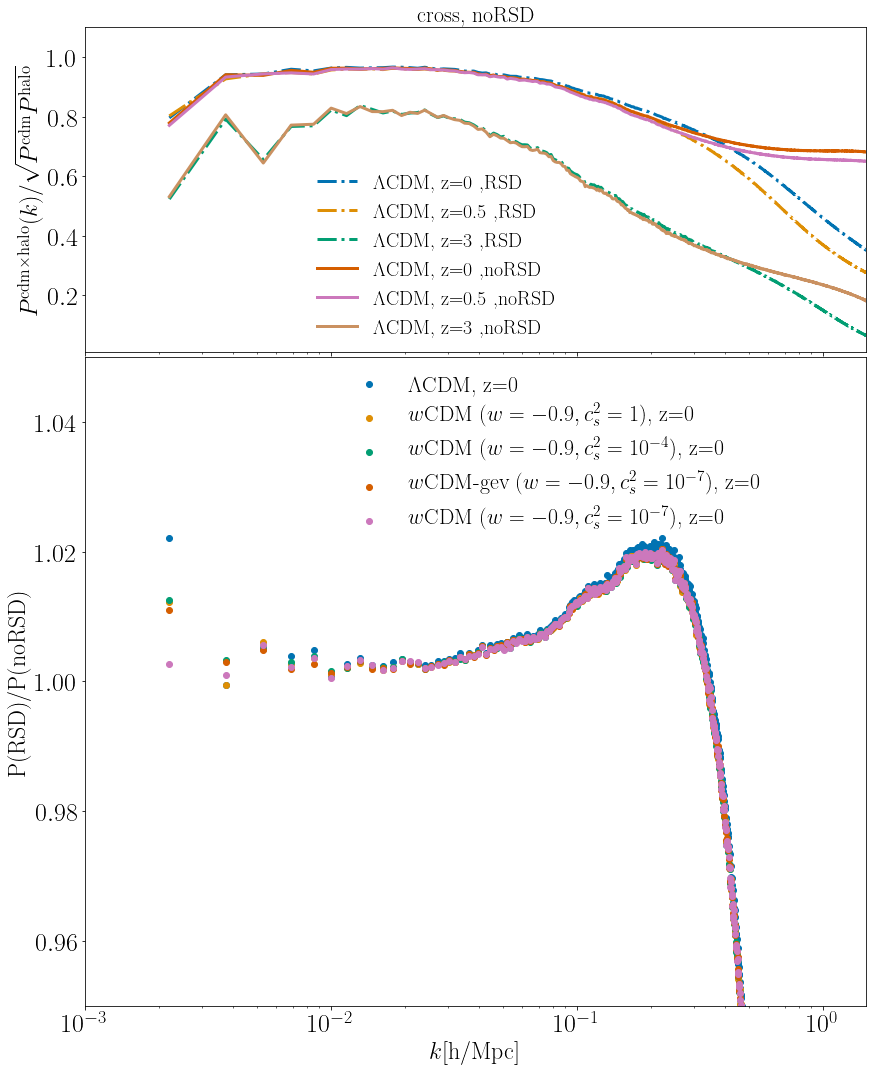

In [126]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(14,18),nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'height_ratios':[1,2]})
plt.subplots_adjust(hspace=0.01)



kind = 'cross'
RSD ='RSD'
decrip = ["$\Lambda$CDM, ","$w$CDM ($w=-0.9, c_s^2=1$), ",
          "$w$CDM ($w=-0.9, c_s^2=10^{-4}$), ","$w$CDM-gev ($w=-0.9, c_s^2=10^{-7}$), ","$w$CDM ($w=-0.9, c_s^2=10^{-7}$), "]
z = ["z=0", "z=0.5", "z=1", "z=2", "z=3"];
l=0
for i in [0]: # file
    for j in [0,1,4]: # Redshifts
        [k_w,pk]=data[kind][RSD][files_list[i]]['pow']['z='+str(redshifts[j])][[0,7],:]  
        [k_w,pk_halo]=data[kind][RSD][files_list[i]]['pow']['z='+str(redshifts[j])][[0,1],:]  
        [k_w,pk_cdm]=data[kind][RSD][files_list[i]]['pow']['z='+str(redshifts[j])][[0,2],:]  

        axs[0].plot(k_w,pk/np.sqrt(pk_halo*pk_cdm),"-.",color =Colors[l], lw=3,label=decrip[i]+z[j]+" ,"+RSD)
        l=l+1
RSD ='noRSD'        
for i in [0]: # file
    for j in [0,1,4]: # Redshifts
        [k_w,pk]=data[kind][RSD][files_list[i]]['pow']['z='+str(redshifts[j])][[0,7],:]  
        [k_w,pk_halo]=data[kind][RSD][files_list[i]]['pow']['z='+str(redshifts[j])][[0,1],:]  
        [k_w,pk_cdm]=data[kind][RSD][files_list[i]]['pow']['z='+str(redshifts[j])][[0,2],:]  

        axs[0].plot(k_w,pk/np.sqrt(pk_halo*pk_cdm),"-",color =Colors[l], lw=3,label=decrip[i]+z[j]+" ,"+RSD)
        l=l+1

axs[0].set_ylabel(r'$P^{\rm{cdm} \times \rm{halo}}(k)/\sqrt {P^{\rm{cdm}}  P^{\rm{halo}}}$',fontsize=24)
axs[0].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[0].set_title(kind+", "+RSD, fontsize=22)

# plt.yscale('log')
# axs[0].xticks(size = 25);
# axs[0].yticks(size = 25);
axs[0].set_ylim(1.e-2,1.1)
axs[0].set_xlim(1.e-3,2.e0)
axs[0].legend(fontsize=20,bbox_to_anchor=[0.45, 0.3], loc='center',frameon=False)
# Relative difference:

l=0
for num1 in [0,1,2,3,4]: # file 1
    for j in [0]: # Redshifts
        RSD ='RSD'
        [k1,pk1]=data[kind][RSD][files_list[num1]]['pow']['z='+str(redshifts[j])][[0,7],:]
        [k_w,pk_halo]=data[kind][RSD][files_list[num1]]['pow']['z='+str(redshifts[j])][[0,1],:]  
        [k_w,pk_cdm]=data[kind][RSD][files_list[num1]]['pow']['z='+str(redshifts[j])][[0,2],:]  
        p_cross_1 = pk1/np.sqrt(pk_cdm*pk_halo);
        RSD ='noRSD'
        [k2,pk2]=data[kind][RSD][files_list[num1]]['pow']['z='+str(redshifts[j])][[0,7],:]  
        [k_w,pk_halo2]=data[kind][RSD][files_list[num1]]['pow']['z='+str(redshifts[j])][[0,1],:]  
        [k_w,pk_cdm2]=data[kind][RSD][files_list[num1]]['pow']['z='+str(redshifts[j])][[0,2],:]  
        p_cross_2 = pk2/np.sqrt(pk_cdm2*pk_halo2);
        p_ratio = (p_cross_1)/p_cross_2;
        axs[1].plot(k1,p_ratio,"o",color =Colors[l], lw=3,label=decrip[num1]+" "+z[j])
        l=l+1;
                

axs[1].set_ylabel(r'P(RSD)/P(noRSD)',fontsize=24)
axs[1].set_xlabel('$k$[h/Mpc]',fontsize=24)
axs[1].set_xscale('log')
# plt.yscale('symlog')
axs[1].set_ylim(0.95,1.05)
axs[1].set_xlim(1.e-3,1.5)
# axs[1].set_yticks([-0.1,-0.05,0,0.05,0.1,0.2,0.3])  
axs[1].legend(fontsize=22,bbox_to_anchor=[0.6, 0.85], loc='center',frameon=False)
X=np.arange(0.001,20,1)
# axs[1].fill_between(X, -1/100.,1/100.,color='k',alpha=.2)
# axs[1].fill_between(X, -2/100.,2/100.,color='k',alpha=.1)
# plt.savefig('noRSD_halo_monopole.pdf', format='pdf',dpi=300, bbox_inches='tight' )
